<img src = "https://escp.eu/sites/default/files/logo/ESCP-logo-white-misalign.svg" width = 400 style="background-color: #240085;">
<h1 align=center><font size = 6>ESCP Business School</font></h1>
<h3 align=center><font size = 5>SCOR Datathon</font><br/>
<font size = 3>The Data Science Challenge Bridging Indian Agricultureal Protection Gap</font></h3>
<h6 align=center>Chapter 3B - Analysis to Clustering Methods (Kharif - Free Level)</h6>

Last Updated: December 09, 2021\
Author: Group 21 - Anniek Brink, Jeanne Dubois, and Resha Dirga

<h3>Chapter Objectives</h3>

<p>This chapter aims to define the best clustering methods to use for the datasets. There are <b><u>four</u></b> methods that we are going to test on this chapter:</p>

<ul>
    <li>KMeans Clustering</li>
    <li>Agglomerative Hierarchical Clustering</li>
    <li>Density-Based Spatial Clustering of Applications with Noise (DBSCAN)</li>
    <li>Mean-Shift Clustering</li>
</ul>

<b><i>Source:</i></b> <a href="https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68">https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68</a>

<h3>Data Overview</h3>

<p>For this analysis, we are using the 2017 datasets since it has the least null-values compared to the other datasets. The data has been normalised on the previous chapter and exported. Thus, this chapter will read the exported datasets and do the analysis without pre-process the data with the assumption the pre-processing steps are performed on previous steps before going into this chapter.</p>

<h3>Chapter 1: Import modules</h3>
<p>This chapter lists all modules that being used on this document. The module import process will be performed on this chapter</p>

In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import pickle
import shap

<h3>Chapter 2: Data Loading and Initial Plotting</h3>
<p>This chapter reads the data and provides a scatter plot as an initial overview. The chapter also gives an overview of value distribution using a histogram</p>

In [2]:
filename = "datasets_preprocessed/df_kharif_preprocessed_to_cluster.csv"

In [3]:
df = pd.read_csv(filename, delimiter=";", index_col = 0)

In [4]:
df = df.dropna(axis=1, how='all')
df = df.dropna()
data_to_clusters = df.drop(columns=['ID'])

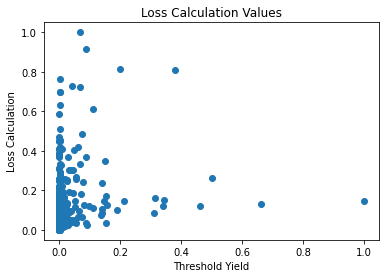

In [5]:
# View datapoints on plot charts
plt.scatter(df['threshold_yield'], df['loss_calculation'])
plt.title("Loss Calculation Values")
plt.xlabel("Threshold Yield")
plt.ylabel("Loss Calculation")
plt.show()

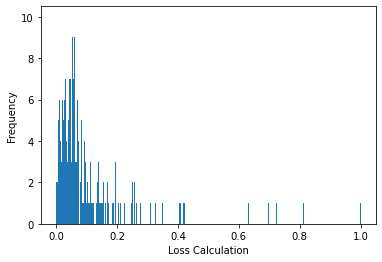

In [6]:
plt.hist(df['loss_calculation'], density=False, bins=1000)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Loss Calculation');

<h3>Chapter 3: Modelling</h3>
<p>This chapter define and compile the model, incuding choosing the best hyperparameters for the model. This chapter will test several model and determine the best models based on analysis.
</p>

<h5>Method 1 - KMeans Clustering</h5>

In [7]:
# Import necessary modules
import faiss

In [8]:
data_to_clusters = data_to_clusters.to_numpy().astype(np.float32)

Sampling a subset of 512 / 579 for training
Clustering 512 points in 74D to 2 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.01 s, search 0.01 s): objective=2.78668e+07 imbalance=1.725 nsplit=0       
Clustering 579 points in 74D to 3 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.00 s, search 0.00 s): objective=1.7212e+07 imbalance=2.421 nsplit=0       
Clustering 579 points in 74D to 4 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.00 s, search 0.00 s): objective=1.20166e+07 imbalance=1.807 nsplit=0       
Clustering 579 points in 74D to 5 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.01 s, search 0.01 s): objective=1.09924e+07 imbalance=1.977 nsplit=0       
Clustering 579 points in 74D to 6 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.01 s, search 0.01 s): objective=8.42034e+06 imbalance=1.603 nsplit=0     

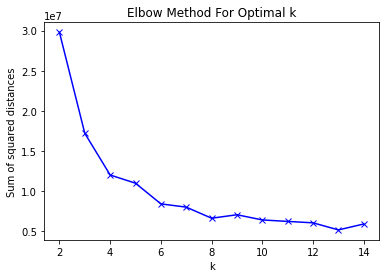

In [9]:
# Determine best k for clustering (check range from 1 to 10)

# Compile inertia values
Sum_of_squared_distances = []
k_test = range(2,15)

x = data_to_clusters.copy(order='C') # define datasets as x

niter = 20
verbose = True
d = x.shape[1]
for k in k_test:
    kmn_model = faiss.Kmeans(d, k, niter=niter, verbose=verbose)
    kmn_model.train(x)
    D, I = kmn_model.index.search(x, 1)
    Sum_of_squared_distances.append(sum(D))

# Shot k method graph
plt.plot(k_test, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Clustering 579 points in 74D to 6 clusters, redo 1 times, 0 iterations
  Preprocessing in 0.00 s

Clustering 579 points in 74D to 6 clusters, redo 1 times, 1 iterations
  Preprocessing in 0.00 s
  Iteration 0 (0.00 s, search 0.00 s): objective=6.2666e+07 imbalance=1.530 nsplit=0       
Clustering 579 points in 74D to 6 clusters, redo 1 times, 2 iterations
  Preprocessing in 0.00 s
  Iteration 1 (0.00 s, search 0.00 s): objective=4.44408e+07 imbalance=1.732 nsplit=0       
Clustering 579 points in 74D to 6 clusters, redo 1 times, 3 iterations
  Preprocessing in 0.00 s
  Iteration 2 (0.00 s, search 0.00 s): objective=8.54833e+06 imbalance=1.634 nsplit=0       
Clustering 579 points in 74D to 6 clusters, redo 1 times, 4 iterations
  Preprocessing in 0.00 s
  Iteration 3 (0.00 s, search 0.00 s): objective=8.46871e+06 imbalance=1.612 nsplit=0       
Clustering 579 points in 74D to 6 clusters, redo 1 times, 5 iterations
  Preprocessing in 0.00 s
  Iteration 4 (0.00 s, search 0.00 s): object

  Iteration 34 (0.01 s, search 0.01 s): objective=8.42034e+06 imbalance=1.603 nsplit=0       
Clustering 579 points in 74D to 6 clusters, redo 1 times, 36 iterations
  Preprocessing in 0.00 s
  Iteration 35 (0.01 s, search 0.01 s): objective=8.42034e+06 imbalance=1.603 nsplit=0       
Clustering 579 points in 74D to 6 clusters, redo 1 times, 37 iterations
  Preprocessing in 0.00 s
  Iteration 36 (0.01 s, search 0.00 s): objective=8.42034e+06 imbalance=1.603 nsplit=0       
Clustering 579 points in 74D to 6 clusters, redo 1 times, 38 iterations
  Preprocessing in 0.00 s
  Iteration 37 (0.01 s, search 0.01 s): objective=8.42034e+06 imbalance=1.603 nsplit=0       
Clustering 579 points in 74D to 6 clusters, redo 1 times, 39 iterations
  Preprocessing in 0.00 s
  Iteration 38 (0.02 s, search 0.01 s): objective=8.42034e+06 imbalance=1.603 nsplit=0       
Clustering 579 points in 74D to 6 clusters, redo 1 times, 40 iterations
  Preprocessing in 0.00 s
  Iteration 39 (0.01 s, search 0.01 s): 

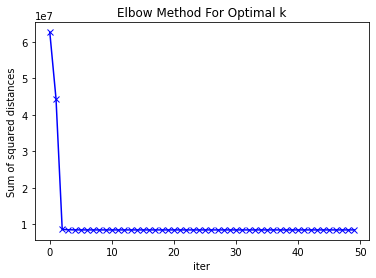

In [10]:
# Determine best iteration for clustering (check range from 10 to 50)

# Compile inertia values
Sum_of_squared_distances = []
i_test = range(0,50)

x = data_to_clusters.copy(order='C') # define datasets as x

k = 6 # from previous test
verbose = True
d = x.shape[1]
for i in i_test:
    kmn_model = faiss.Kmeans(d, k, niter=i, verbose=verbose)
    kmn_model.train(x)
    D, I = kmn_model.index.search(x, 1)
    Sum_of_squared_distances.append(sum(D))

# Shot k method graph
plt.plot(i_test, Sum_of_squared_distances, 'bx-')
plt.xlabel('iter')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Clustering 579 points in 74D to 6 clusters, redo 1 times, 10 iterations
  Preprocessing in 0.00 s


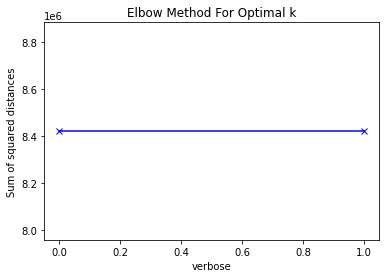

In [11]:
# Determine best verbose for clustering

# Compile inertia values
Sum_of_squared_distances = []
v_test = [False, True]

x = data_to_clusters.copy(order='C') # define datasets as x

k = 6 # from previous test
niter = 10 # from previous test
d = x.shape[1]
for v in v_test:
    kmn_model = faiss.Kmeans(d, k, niter=niter, verbose=v)
    kmn_model.train(x)
    D, I = kmn_model.index.search(x, 1)
    Sum_of_squared_distances.append(sum(D))

# Shot k method graph
plt.plot(v_test, Sum_of_squared_distances, 'bx-')
plt.xlabel('verbose')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
# Train K-Means model
x = data_to_clusters.copy(order='C') # define datasets as x

ncentroids = 4
niter = 10
verbose = True
d = x.shape[1]
kmn_model = faiss.Kmeans(d, ncentroids, niter=niter, verbose=verbose)
kmn_model.train(x)


Clustering 579 points in 74D to 4 clusters, redo 1 times, 10 iterations
  Preprocessing in 0.00 s


12016588.0

In [33]:
# Assign clustering result
D, I = kmn_model.index.search(x, 1)

df['kmn_clusters'] = I

Text(0, 0.5, 'Loss Calculation')

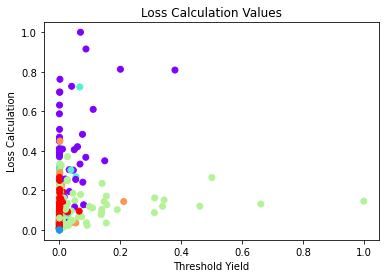

In [14]:
plt.scatter(df['threshold_yield'],
            df['loss_calculation'],
            c=df['kmn_clusters']
            ,cmap='rainbow')
plt.title("Loss Calculation Values")
plt.xlabel("Threshold Yield")
plt.ylabel("Loss Calculation")

<h5>Method 2 - Agglomerative Hierarchical Clustering</h5>

In [15]:
# Import necessary modules
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

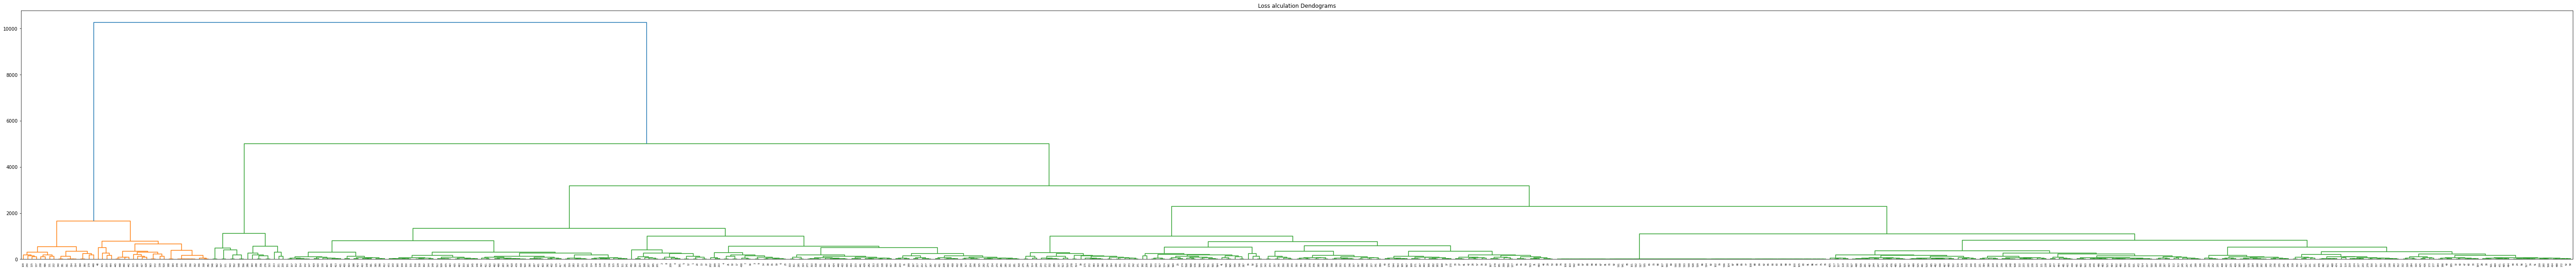

In [16]:
# Create overall dendogram
plt.figure(figsize=(100, 10))
plt.title("Loss alculation Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

plt.axhline(y=max(D), color='r', linestyle='--')

In [34]:
# Train and assign cluster to dataset
shc_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df['shc_clusters'] = shc_model.fit_predict(x)

In [18]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

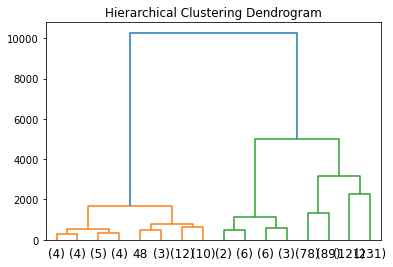

In [19]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(x)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)

Text(0, 0.5, 'Loss Calculation')

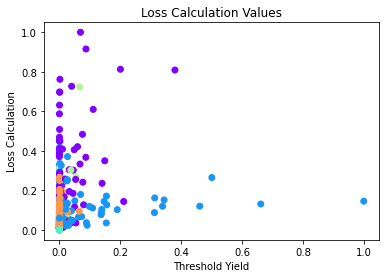

In [20]:
plt.scatter(df['threshold_yield'],
            df['loss_calculation'],
            c=df['shc_clusters']
            ,cmap='rainbow')
plt.title("Loss Calculation Values")
plt.xlabel("Threshold Yield")
plt.ylabel("Loss Calculation")

<h5>Method 3 - Density-Based Spatial Clustering of Applications with Noise (DBSCAN)</h5>

In [21]:
# Import necessary modules
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
<br/>
<i>source: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd</i>

In [22]:
# Train model for epsilon optimisation
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

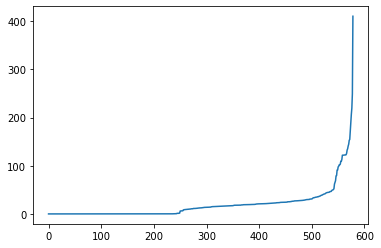

In [23]:
# Get distances for epsilon optimasion
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

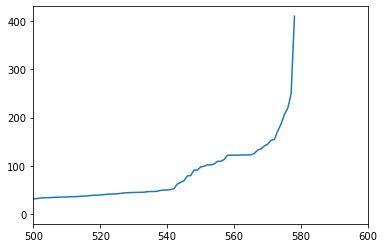

In [24]:
# Zoom in to elbow
plt.xlim([500,600])
plt.plot(distances)

In [25]:
# Train model for dataset and assign cluster to dataset
dbs_model = DBSCAN(eps=1/570, min_samples=4).fit(x)
df['dbs_clusters'] = dbs_model.labels_

Text(0, 0.5, 'Loss Calculation')

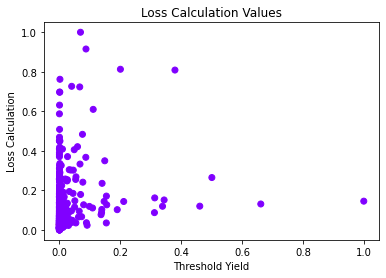

In [26]:
plt.scatter(df['threshold_yield'],
            df['loss_calculation'],
            c=df['dbs_clusters']
            ,cmap='rainbow')
plt.title("Loss Calculation Values")
plt.xlabel("Threshold Yield")
plt.ylabel("Loss Calculation")

<h5>Method 4 - Mean-Shift Clustering</h5>

In [27]:
# Import necessary modules
from sklearn.cluster import MeanShift, estimate_bandwidth

In [28]:
# Train model for dataset and assign cluster to dataset
bandwidth = estimate_bandwidth(x)
msc_model = MeanShift(bandwidth=bandwidth).fit(x)
df['msc_clusters'] = msc_model.labels_

Text(0, 0.5, 'Loss Calculation')

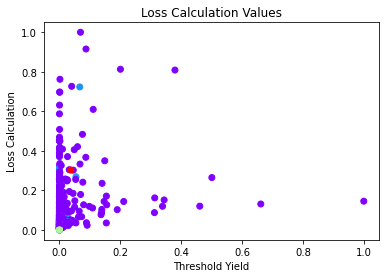

In [29]:
plt.scatter(df['threshold_yield'],
            df['loss_calculation'],
            c=df['msc_clusters']
            ,cmap='rainbow')
plt.title("Loss Calculation Values")
plt.xlabel("Threshold Yield")
plt.ylabel("Loss Calculation")

<h3>Chapter 3: Model evaluation</h3>
<p>This chapter explains the evaluation of models for the dataset and determine the best model to cluster the dataset. The choosen model will be applied across dataset with the same hyperparameters for consistency. To evaluate the model, we will use Davies Bouldin Index.</p>
<p>Please note that this chapter does not include the analysis of each cluster and definition to business context. Those analyses will be performed on the latter chapters.</p>

In [30]:
df

,ID,threshold_yield,loss_calculation,Average Temperature January (C),Average Temperature February (C),Average Temperature March (C),Average Temperature April (C),Average Temperature May (C),Average Temperature June (C),Average Temperature July (C),...,Average Sun Hours July,Average Sun Hours August,Average Sun Hours September,Average Sun Hours October,Average Sun Hours November,Average Sun Hours December,kmn_clusters,shc_clusters,dbs_clusters,msc_clusters
0,andhra pradesh_1_anantapur,0.009391,0.013688,24.3,26.9,30.2,32.3,31.7,28.5,27.2,...,8.3,7.9,8.4,8.6,8.0,8.1,4,0,-1,0
1,andhra pradesh_1_chittoor,0.013217,0.037898,22.3,24.4,27.2,29.6,30.9,29.2,28.4,...,10.2,9.9,9.7,8.3,6.7,6.3,4,0,-1,0
2,andhra pradesh_1_cuddapah,0.001068,0.062784,24.3,26.7,30.0,32.7,33.4,30.6,29.3,...,9.3,8.8,9.0,8.5,7.3,6.9,4,0,-1,0
3,andhra pradesh_1_east godavari,0.023766,0.130029,23.8,25.3,27.8,29.9,31.9,30.4,28.6,...,10.1,9.7,9.0,8.7,8.9,8.7,4,0,-1,0
4,andhra pradesh_1_guntur,0.003393,0.024240,24.2,26.1,28.7,31.0,33.3,31.3,29.4,...,10.4,9.8,9.2,8.5,8.2,7.8,4,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,west bengal_4_nadia,0.000303,0.108840,18.3,21.9,26.4,29.5,29.9,29.3,28.1,...,7.9,7.8,7.8,8.4,9.0,8.6,5,4,-1,0
575,west bengal_4_north 24 parganas,0.000380,0.072109,19.0,22.7,27.0,29.8,30.4,29.4,28.1,...,8.1,7.8,7.9,8.3,8.9,8.7,5,4,-1,0
576,west bengal_4_purba medinipur,0.000480,0.134470,19.4,23.1,27.3,30.1,30.8,29.8,28.3,...,8.5,8.1,8.1,8.4,8.9,8.8,5,4,-1,0
577,west bengal_4_purulia,0.000197,0.065657,17.3,21.3,26.2,30.4,31.0,29.6,27.3,...,7.5,6.9,7.3,8.4,9.1,9.0,5,4,-1,0


In [35]:
for cluster in ['kmn', 'shc', 'dbs', 'msc']:
    try:
        score = metrics.davies_bouldin_score(x, df[cluster+'_clusters'])
        print(cluster, '> # of clusters:', len(df[cluster+'_clusters'].unique()), '| DBI:', score)
    except:
        pass

kmn > # of clusters: 4 | DBI: 0.7389905560072272
shc > # of clusters: 4 | DBI: 0.7477160635357762
dbs > # of clusters: 2 | DBI: 3.672178118449783
msc > # of clusters: 6 | DBI: 0.7347998504196805


In [36]:
# Export csv after clustering
df.to_csv("datasets_clustered/kharif_clustered_done.csv", sep=';')

In [ ]:
# Export selected model
model = shc_model
pickle.dump(model, open("clustering_models/model_kharif_level.pkl", "wb"))